In [106]:
# Importing libraries
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import numpy as np
from scipy import stats
import panel as pn
pn.extension('tabulator') # for creating interactive tables

import hvplot.pandas #for creating interactive dataframes

In [4]:
# Read Data
df = pd.read_csv(r"C:\Users\daphn\Downloads\master.csv")

In [111]:
# View data
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# Data Cleaning

In [6]:
#Checking for missing data fields
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print ('{}-{}%'.format(col,pct_missing))

country-0.0%
year-0.0%
sex-0.0%
age-0.0%
suicides_no-0.0%
population-0.0%
suicides/100k pop-0.0%
country-year-0.0%
HDI for year-0.699352983465133%
 gdp_for_year ($) -0.0%
gdp_per_capita ($)-0.0%
generation-0.0%


In [14]:
#Rename columns
df.rename(columns={'gdp_for_year ($)':'gdp_for_year','gdp_per_capita ($)':'gdp_per_capita',
                                       'gdp_per_capita ($)':'gdp_per_capita'},inplace=True)

# Date Processing
+ Creating widgets
+Filtering data for use in our visualization

In [110]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [113]:
# Sorting data by gdp_per_capita
df.sort_values(by=['gdp_per_capita'], inplace=False, ascending=False)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [18]:
# Make Dataframe Pipeline Interactive
idf=df.interactive()

In [20]:
#Define panel widgets, widgets like sliders,interactive elements on dashboard
year_slider=pn.widgets.IntSlider(name='Year slider', start=1987, end=2017, step=3)
year_slider

IntSlider(end=2017, name='Year slider', start=1987, step=3, value=1987)

In [23]:
#Radio buttons for suicide measures
yaxis_suicide_no=pn.widgets.RadioButtonGroup(
    name='Y axis',
    options=['suicides_no', 'suicides/100k pop',],
    button_type='success'
)

In [77]:
# Connecting Data Pipeline with widgets, so anythime we change widget data is also updated
countries=['Canada', 'Qatar', 'United States', 'United Kingdom', 'Russian Federation',]
suicide_pipeline= (
    idf[
        (idf.year<=year_slider) &
        (idf.country.isin(countries))
    ]
    .groupby(['country', 'year'])[yaxis_suicide_no].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='year')
    .reset_index(drop=True)
)
                

In [49]:
#Showing the widget for the suicide pipeline we just created
suicide_pipeline

# Suicide Rate overtime by Country Graph

In [50]:
suicide_plot = suicide_pipeline.hvplot(x ='year', by= 'country', y=yaxis_suicide_no, line_width=2.5, title= 'Suicide Rate by Country')
suicide_plot

# Suicide Rate overtime by Country-Table

In [51]:
suicide_table = suicide_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size=10, sizing_mode='stretch_width')
suicide_table

# Suicide Rate VS Sex Plots
+ Using Seaborn to plot the performance of both sexes overtime
+ Applying our widget to do a scatterplot on filtered countries

C:\Users\daphn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\daphn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


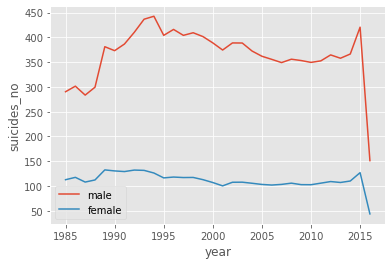

In [33]:
df_men = df[df.sex == "male"]
df_women = df[df.sex == "female"]
sn.lineplot(df_men.year, df.suicides_no, ci = None)
sn.lineplot(df_women.year, df.suicides_no, ci = None)
plt.legend(["male", 'female'])
plt.show()

In [52]:
# First create a data pipeline
suicide_vs_sex_scatterplot_pipeline=(
    idf[
        (idf.year==year_slider)&
        (idf.country.isin(countries))
    ]
    .groupby(['country', 'year', 'sex'])['suicides_no'].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='year')
    .reset_index(drop=True)
)

In [53]:
#Viewing the pipeline
suicide_vs_sex_scatterplot_pipeline

In [55]:
# Creating the scatterplot
suicide_vs_sex_scatterplot= suicide_vs_sex_scatterplot_pipeline.hvplot(x='sex',
                                                                       y='suicides_no',
                                                                       by='country',
                                                                       size=80, kind='scatter',
                                                                       alpha=0.7,
                                                                       legend=True,
                                                                       height=500,
                                                                       width=500)
suicide_vs_sex_scatterplot

# Suicide Rate VS Age Plots

In [56]:
# Creatine a linechart to determine if age is a factor for suicides inthese countries
# We create a pipeline
suicide_vs_age_linechart_pipeline=(
    idf[
        (idf.year==year_slider)&
        (idf.country.isin(countries))
    ]
    .groupby(['country', 'age'])['suicides_no'].sum()
    .to_frame()
    .reset_index()
    .sort_values(by=['age'], inplace=False, ascending=False)
    .reset_index(drop=True)
)

In [57]:
#Viewing the pipeline
suicide_vs_age_linechart_pipeline

In [108]:
# Creating the linechart
suicide_vs_age_linechart= suicide_vs_age_linechart_pipeline.hvplot(x='age',
                                                                       y='suicides_no',
                                                                       by='country',
                                                                       size=80, kind='line',
                                                                       alpha=0.7,
                                                                       legend=True,
                                                                       height=500,
                                                                       width=700)
suicide_vs_age_linechart

# Correlated Variable to Suicide Rates
+ Build  a scatterplot with Suicide vs GDP
+ Show the correlation coefficient for filtered countries

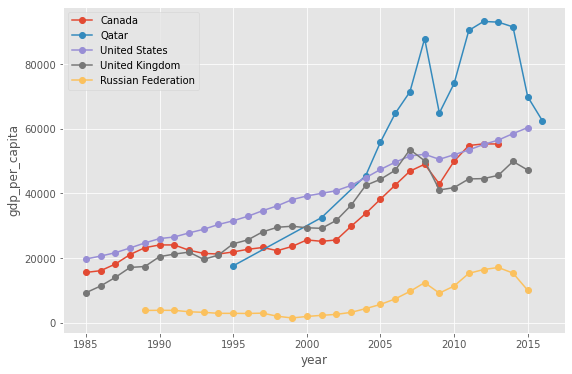

In [90]:
#lets see the gdp_per_capita overtime in our filtered countries on a linechart using matplotlib
plt.figure(figsize = (9,6))
df_gdp = df.groupby(["country","year"]).gdp_per_capita.mean()
for country in countries:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country, marker="o")
plt.xlabel("year")
plt.ylabel("gdp_per_capita")
plt.legend()
plt.show()

In [109]:
# Using Panels to build this scatterplo
suicide_vs_gdp_scatterplot_pipeline = (
    idf[
        (idf.year == year_slider) &
        (idf.country.isin(countries))
    ]
    .groupby(['country', 'year', 'gdp_per_capita'])['suicides/100k pop'].sum()
    .to_frame()
    .reset_index()
    .sort_values(by='year')  
    .reset_index(drop=True)
)

In [102]:
suicide_vs_gdp_scatterplot_pipeline

In [103]:
suicide_vs_gdp_scatterplot = suicide_vs_gdp_scatterplot_pipeline.hvplot(x='gdp_per_capita', 
                                                                y='suicides/100k pop', 
                                                                by='country', 
                                                                size=80, kind="scatter", 
                                                                alpha=0.7,
                                                                legend=True, 
                                                                height=500, 
                                                                width=500)
suicide_vs_gdp_scatterplot

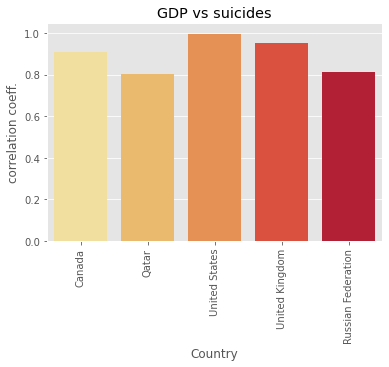

In [107]:
corr_eff = {}
for country in countries:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_gdp[country].values,df_gdp[country].index)
    corr_eff[country] = float(r_value)
    
sn.barplot(x=list(corr_eff.keys()), y=list(corr_eff.values()), palette = "YlOrRd")
plt.xticks(rotation = 90)
plt.xlabel("Country")
plt.ylabel("correlation coeff.")
plt.title("GDP vs suicides")
plt.show()